In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
import pydotplus
import pandas as pd
import numpy as np
import os

In [ ]:
from IPython.display import Image 

In [ ]:
# 데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving pasteurizer.csv to pasteurizer.csv


In [ ]:
df = pd.read_csv("pasteurizer.csv")

In [ ]:
print(df)

                  STD_DT  MIXA_PASTEUR_STATE  ...  MIXB_PASTEUR_TEMP  INSP
0        2020-03-04 6:00                 1.0  ...              524.0    OK
1        2020-03-04 6:30                 1.0  ...              536.0    OK
2        2020-03-04 7:00                 1.0  ...              536.0    OK
3        2020-03-04 7:30                 1.0  ...              536.0    OK
4        2020-03-04 8:00                 1.0  ...              536.0    OK
...                  ...                 ...  ...                ...   ...
210789  2020-11-11 18:34                 NaN  ...              566.0    OK
210790  2020-11-11 18:35                 NaN  ...              569.0    OK
210791  2020-11-11 18:36                 NaN  ...              572.0    OK
210792  2020-11-11 18:37                 NaN  ...              575.0    OK
210793  2020-11-11 18:38                 NaN  ...              576.0    OK

[210794 rows x 6 columns]


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

(array([9383.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         100.]),
 array([      0. ,  560384.1, 1120768.2, 1681152.3, 2241536.4, 2801920.5,
        3362304.6, 3922688.7, 4483072.8, 5043456.9, 5603841. ]),
 <a list of 10 Patch objects>)

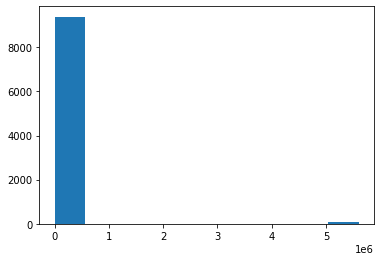

In [ ]:
plt.hist(df['MIXA_PASTEUR_STATE'])

In [ ]:
df = df[df.MIXA_PASTEUR_STATE < 2]

In [ ]:
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
160703,2020-09-15 15:00,1.0,1.0,560.0,580.0,OK
160734,2020-09-15 15:30,1.0,1.0,588.0,555.0,OK
160765,2020-09-15 16:00,1.0,1.0,588.0,550.0,OK
160796,2020-09-15 16:30,1.0,1.0,595.0,555.0,OK


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f3c09890>,
      dtype=object)

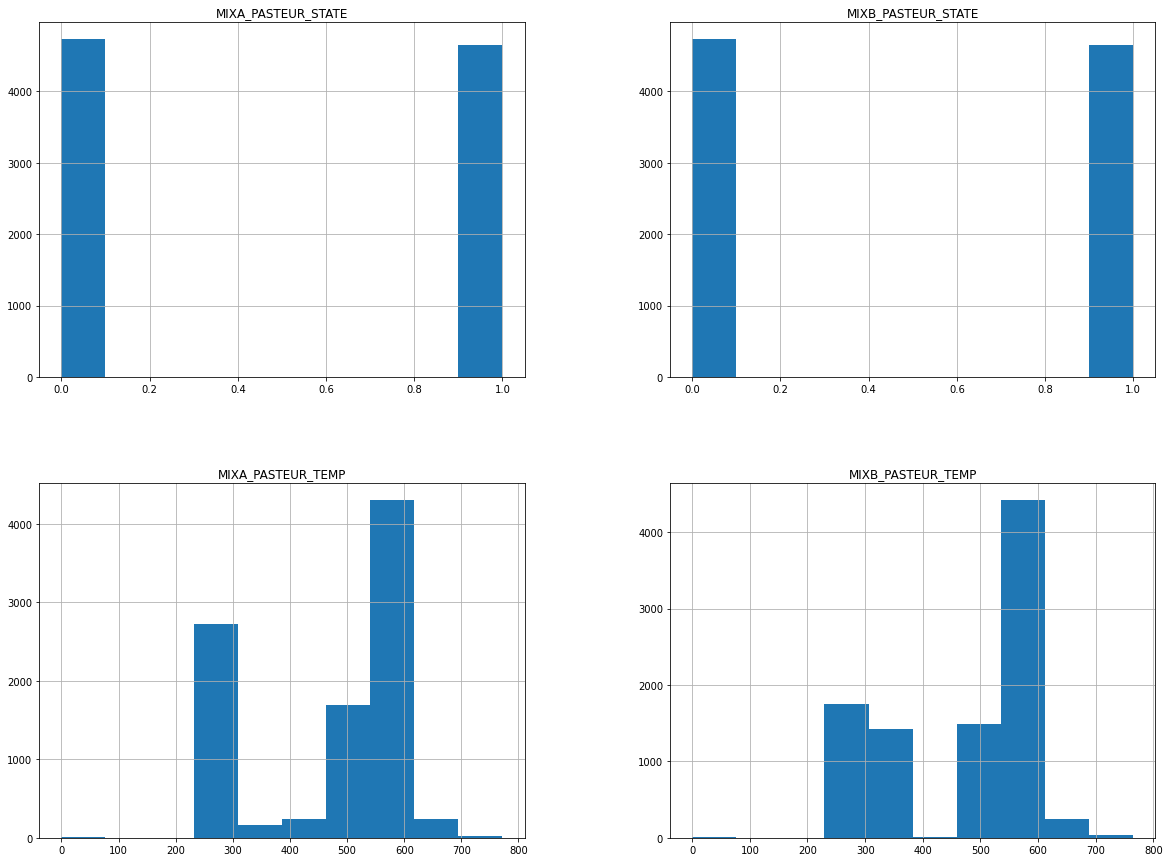

In [ ]:
df.hist(bins=10, figsize=(20,15))

In [ ]:
# 모델링 
y = df.iloc[:, -1:].values
y = np.where(y == 'OK', 1, 0)
y = y.ravel()

In [ ]:
3 #학습/평가 데이터 분리
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1:].values

In [ ]:
y = np.where(y=='OK', 1, 0)
y = y.ravel()

In [ ]:
print(X.shape, y.shape)

(9383, 4) (9383,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [ ]:
X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  1.,   1., 543., 578.],
       [  1.,   1., 594., 583.],
       [  1.,   1., 582., 542.]])

In [ ]:
df_clf = DecisionTreeClassifier(max_depth=3)
df_clf = df_clf.fit(X_train, y_train)
df_prediction = df_clf.predict(X_test)

In [ ]:
feature_names = df.columns.tolist()
feature_names = feature_names[1:5]
target_name = np.array(['0','1'])

In [ ]:
dt_dot_data = tree.export_graphviz(df_clf, feature_names = feature_names, class_names = target_name, filled = True, rounded = True,
                                  special_characters = True)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

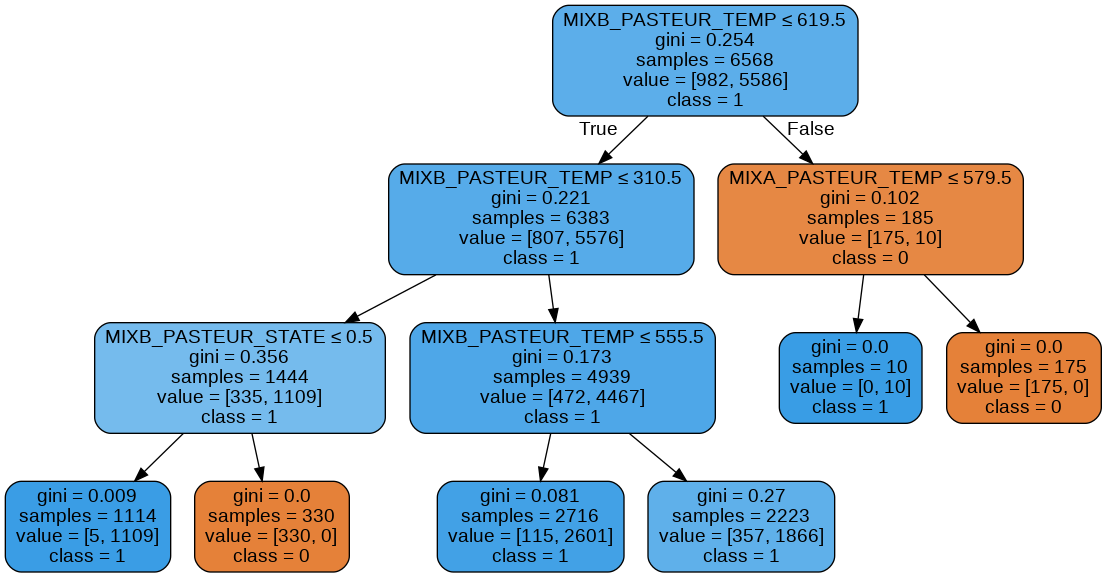

In [ ]:
Image(dt_graph.create_png())

In [ ]:
# 모델 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, F1: {3:.4F}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 테스트 데이터 0.3
get_clf_eval(y_test, df_prediction)

오차 행렬
[[ 314  238]
 [  68 3134]]
정확도: 0.9185, 정밀도:0.9294, 재현율: 0.9788, F1: 0.9535, AUC:0.7738


In [ ]:
# 테스트 데이터 0.4
get_clf_eval(y_test, df_prediction)

오차 행렬
[[ 237  196]
 [   1 2381]]
정확도: 0.9300, 정밀도:0.9239, 재현율: 0.9996, F1: 0.9603, AUC:0.7735


In [ ]:
# 나무가지 4개
get_clf_eval(y_test, df_prediction)

오차 행렬
[[ 238  195]
 [   1 2381]]
정확도: 0.9304, 정밀도:0.9243, 재현율: 0.9996, F1: 0.9605, AUC:0.7746


In [ ]:
df_clf = DecisionTreeClassifier(max_depth=5)
df_clf = df_clf.fit(X_train, y_train)
df_prediction = df_clf.predict(X_test)

feature_names = df.columns.tolist()
feature_names = feature_names[1:5]
target_name = np.array(['0','1'])

In [ ]:
dt_dot_data = tree.export_graphviz(df_clf, feature_names = feature_names, class_names = target_name, filled = True, rounded = True,
                                  special_characters = True)

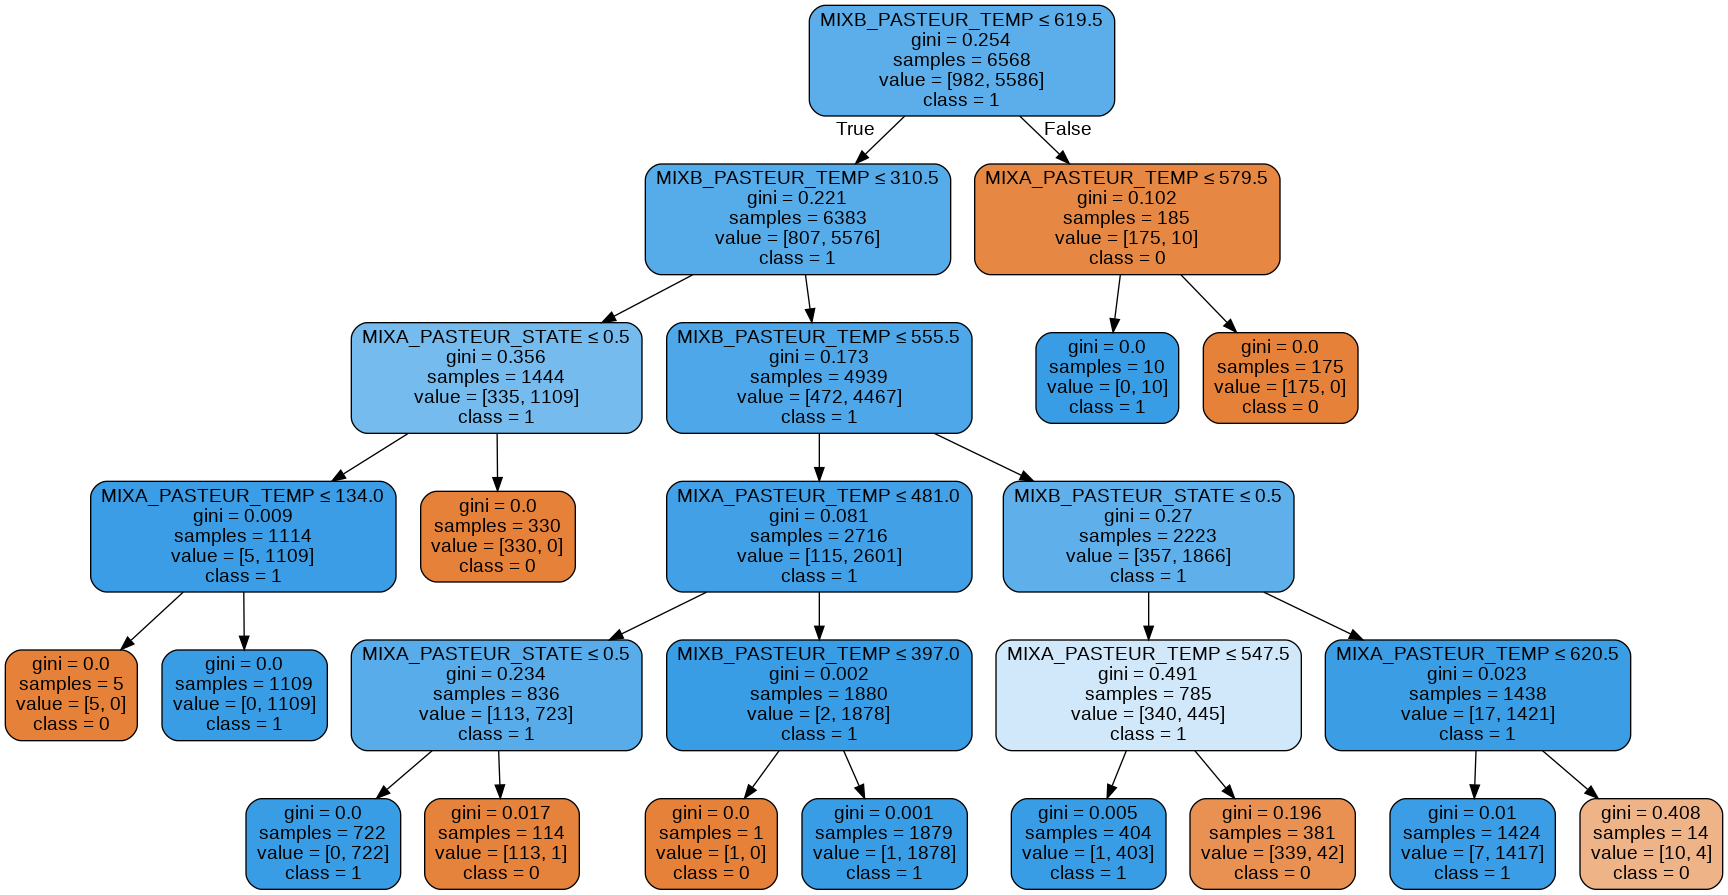

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [ ]:
# 모델 깊이5
get_clf_eval(y_test, df_prediction)

오차 행렬
[[ 423   10]
 [  19 2363]]
정확도: 0.9897, 정밀도:0.9958, 재현율: 0.9920, F1: 0.9939, AUC:0.9845
